# Multi-arm Bandits
Bandit problems are a special case of reinforcement learning where there is only one state but many possible actions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm

Some simulation parameters.  Try re-running the notebook with different variations.

In [2]:
num_games = 1000   # Number of games to play
num_actions = 10   # Number of choices in a single game
num_steps = 10000  # Number of steps to play a game
num_agents = 100   # Number of agents to simulate

Let's create some games.  For each game, there are `num_action` actions.  Each action in each game has an expected value.  The reward for a particular action is a sample from a normal distribution with that action's mean.

In [3]:
game_means = np.random.normal(scale=1.0, size=(num_games, num_actions))
game_stddev = 1.0

In [4]:
%%time
epsilons = np.logspace(0, -2, num_agents)
steps = np.arange(num_steps)
R = np.zeros((num_agents, num_steps))  # Average reward received at each step
O = np.zeros((num_agents, num_steps))  # Optimal choice percentage at each step
for g in range(num_games):
    # At the beginning of each game, re-initialize all the agent states
    N = np.ones((num_agents, num_actions))   # Counts of each action
    Q = np.zeros((num_agents, num_actions))  # Average reward of each action
    optimal = np.argmax(game_means[g])  # The optimal choice in this game
    for s in steps:
        for i, epsilon in enumerate(epsilons):
            # Pick a choice
            if np.random.rand() < epsilon:  # Exploration: random choice
                c = np.random.randint(num_actions)
            else:  # Exploitation: pick the choice that has given the highest average reward
                c = np.random.choice(np.flatnonzero(Q[i] == Q[i].max()))  # Randomly resolve ties
            # Generate the reward from the choice
            r = np.random.normal(loc=game_means[g][c], scale=game_stddev)
            # Update the agent
            N[i][c] += 1
            Q[i][c] += (r - Q[i][c]) / N[i][c]
            # Update our measurement statistics (for plotting at the end)
            R[i][s] += r / num_games
            O[i][s] += float(c == optimal) / num_games
C = R.cumsum(axis=1) / np.arange(1, num_steps + 1)  # Cumulative average reward at each step
Z = O.cumsum(axis=1) / np.arange(1, num_steps + 1)  # Cumulative optimal choice percentage at each step

CPU times: user 3h 55min 30s, sys: 8.98 s, total: 3h 55min 39s
Wall time: 3h 55min 54s


In [32]:
def plot(Y, title):
    plt.axes().set_prop_cycle(color=[plt.cm.viridis(i) for i in np.linspace(0,1,Y.shape[0])])
    plt.plot(np.transpose(Y))
    plt.ylabel(title)
    plt.xlabel('steps')
    plt.title(title)
    plt.show()

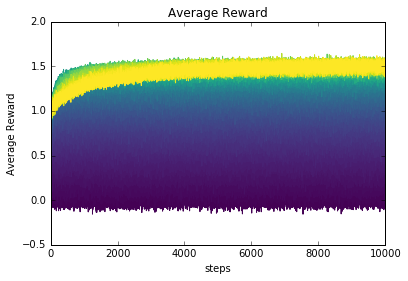

In [33]:
plot(R, 'Average Reward')

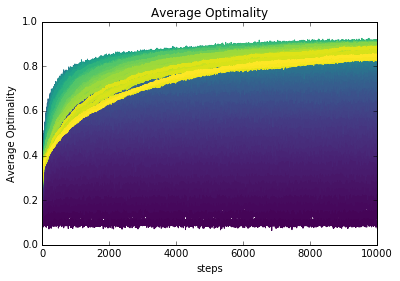

In [34]:
plot(O, 'Average Optimality')

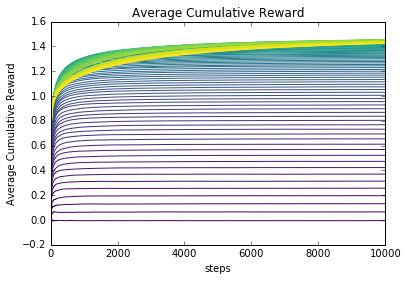

In [35]:
plot(C, 'Average Cumulative Reward')

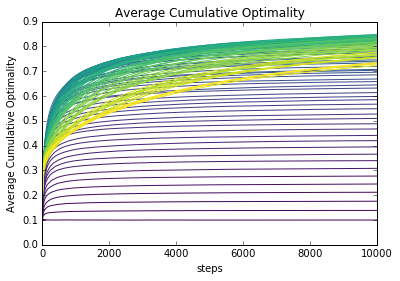

In [36]:
plot(Z, 'Average Cumulative Optimality')

In [37]:
def mesh(Y, title):
    y, x = np.meshgrid(epsilons, steps)
    plt.pcolormesh(x, y, np.transpose(Y), norm=PowerNorm(10, vmin=Y.min(), vmax=Y.max()), cmap=plt.cm.viridis)
    plt.yscale('log')
    plt.ylabel('epsilon')
    plt.xlabel('steps')
    plt.title(title)
    plt.show()

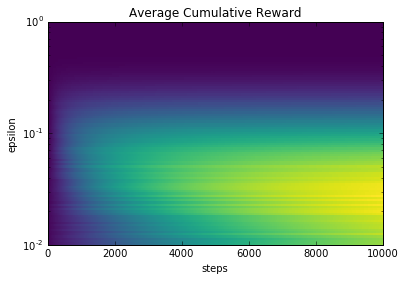

In [38]:
mesh(C, 'Average Cumulative Reward')

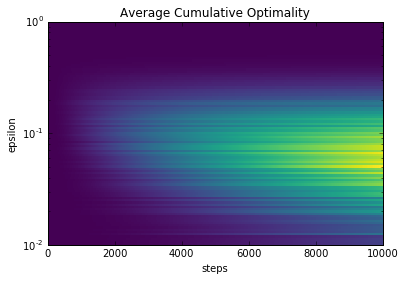

In [39]:
mesh(Z, 'Average Cumulative Optimality')